In [194]:
import numpy as np
import matplotlib.pyplot as plt

In [195]:
# modelling the arrival process

# per second converyor belt

conveyor1=1
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 
conveyor2=2/3

stationFailrate=0.01
stationmean=1/stationFailrate

In [196]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return N

In [197]:
# total number of entities conveyor1 delivers per second for 1000 seconds
c1sample=[poisson_est(1)  for i in range(1000)]


In [198]:
# total entities conveyor belt delivers
totalc1=sum(c1sample)
totalc1

987.0

In [199]:
def conveyor2(time):
    # number of entities conveyor2 delivers over a given time
    return (int(time/1.5))
conveyor2(1000)

666

In [200]:
def failtime(frate,time):
    # per unit time
    time=time%100
    # cdf of failure 
    c_fail=1 - np.exp(-frate* time)
    if(c_fail>=np.random.random()):
        return time
    else: 
        return 0    

In [201]:
def failnow(frate,time):
    # prob of failure in next second
    p_fail=frate*np.exp(-frate*0)+ frate*np.exp(-frate*1)

    if(p_fail>=np.random.random()):
        return time
    else: 
        return 0 

In [202]:
f=np.array([failnow(0.01,time) for time in range(10000)])
(10000-sum(f==0)) /10000
# failtime=
f[f!=0]



array([  32,   40,  122,  174,  183,  265,  277,  338,  372,  415,  456,
        480,  484,  489,  499,  601,  647,  668,  671,  737,  795,  844,
        891,  905,  960, 1078, 1196, 1227, 1368, 1508, 1560, 1566, 1568,
       1605, 1621, 1672, 1717, 1788, 1837, 1900, 1920, 1954, 2035, 2057,
       2062, 2226, 2316, 2424, 2502, 2553, 2556, 2650, 2677, 2715, 2732,
       2735, 2764, 2808, 2827, 3009, 3169, 3300, 3309, 3406, 3445, 3449,
       3465, 3471, 3497, 3509, 3541, 3558, 3595, 3724, 3755, 3800, 3825,
       3831, 3928, 3935, 3939, 3951, 3968, 3987, 3994, 4002, 4012, 4017,
       4057, 4081, 4104, 4116, 4265, 4329, 4331, 4348, 4353, 4441, 4451,
       4653, 4668, 4752, 4796, 4799, 4855, 4997, 5013, 5040, 5064, 5110,
       5134, 5182, 5220, 5301, 5345, 5354, 5402, 5407, 5411, 5415, 5608,
       5949, 5969, 6035, 6050, 6180, 6181, 6192, 6229, 6270, 6300, 6340,
       6415, 6533, 6652, 6667, 6673, 6717, 6741, 6772, 6872, 6875, 6886,
       6917, 6944, 6974, 7060, 7117, 7200, 7247, 73

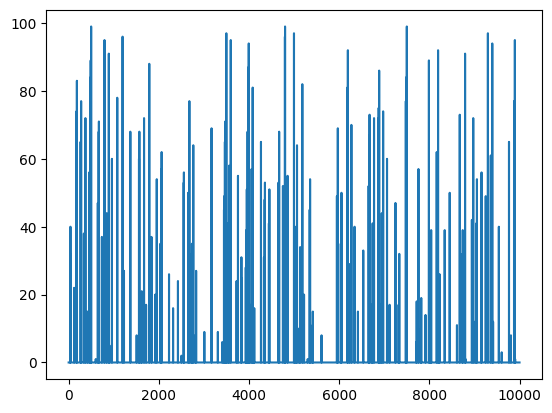

In [203]:
f=f%100
plt.plot(np.arange(0,10000),f)

In [204]:
# for each second, check the 
def simulate(time):
    C1event=[]
    stationFailures=[]
    completed=0

    # stacks to count waiting entities at each conveyour belt C
    stackC1=[]
    stackC2=[]
    def addtoC1(time_index,stackC1,C1event):
            if len(stackC1)==0:
                stackC1.append(C1event[time_index])
            else:
                stackC1.append(C1event[time_index]+stackC1[-1])

    # add a entity to the stack every 1.5 seconds
    def addtoC2(time_index,stackC2):
        if time_index%1.5==0:
            if len(stackC2)==0:
                stackC2.append(1)
            else:
                stackC2.append(stackC2[-1]+1)
        else:
            pass



# simulate events with respect to random variables
    for t in np.arange(0,time):
        C1event.append(poisson_est(1))
        stationFailures.append(failnow(0.01,t))

    for time_index in np.arange(0,time):
        addtoC1(time_index,stackC1,C1event)
        addtoC2(time_index,stackC2)
        
        # if both parts are ready
        if stackC1 and stackC2 and stackC1[-1]>0 and stackC2[-1]>0:
            # check if the machine is working
            if stationFailures[time_index]>0:
                for standyby in range(5):
                    curr=standyby+1+time_index

                    # conveyors run during downtime
                    addtoC1(curr,stackC1,C1event)
                    addtoC2(curr,stackC2)

                # count continues 5 seconds after
                if time_index+5==time:
                    return completed

                # else
                time_index+=5
                completed+=1
            else: #if the machine is working
                completed+=1
    return completed



In [205]:
simulate(10000)

10000